In [1]:
import pandas as pd
from scipy.stats import ks_2samp, chi2_contingency,entropy
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os
from scipy.spatial.distance import jensenshannon

In [2]:
# Function to compare two columns using appropriate statistical test
def compare_columns_ks(col1, col2, column_name):
    if col1.dtype == 'O':  
        # Chi-squared test for categorical data
        contingency_table = pd.crosstab(col1, col2)
        chi2, p, _, _ = chi2_contingency(contingency_table)
        test = 'Chi-squared'
    else:
        # KS test for numerical data
        ks_statistic, p = ks_2samp(col1, col2)
        test = 'Kolmogorov-Smirnov'

    if p < 0.2:
        print(f"{column_name}: No Significant difference (p-value: {p:.3f}) - {test} test")
    else:
        print(f"{column_name}: Significant difference (p-value: {p:.3f}) - {test} test")

In [3]:
def kl_divergence(p, q):
    return entropy(p, q)

def compare_columns_kl(col1, col2, column_name):
    if col1.dtype == 'O':
        # Chi-squared test for categorical data
        contingency_table = pd.crosstab(col1, col2)
        chi2, p, _, _ = chi2_contingency(contingency_table)
        test = 'Chi-squared'
        if p < 0.05:
            print(f"{column_name}: Significant difference (p-value: {p:.3f}) - {test} test")
        else:
            print(f"{column_name}: No significant difference (p-value: {p:.3f}) - {test} test")
    else:
        # Convert data to probability distributions
        # Here, using histograms
        p_hist, _ = np.histogram(col1, bins=30, range=(min(col1.min(), col2.min()), max(col1.max(), col2.max())), density=True)
        q_hist, _ = np.histogram(col2, bins=30, range=(min(col1.min(), col2.min()), max(col1.max(), col2.max())), density=True)
        
        # Calculate KL divergence
        kl_div = kl_divergence(p_hist, q_hist)
        print(f"{column_name}: KL Divergence: {kl_div:.3f}")


In [4]:
def js_divergence(p, q):
    return jensenshannon(p, q)**2 

def compare_columns_js(col1, col2, column_name):
    if col1.dtype == 'O':
        # Chi-squared test for categorical data
        contingency_table = pd.crosstab(col1, col2)
        chi2, p, _, _ = chi2_contingency(contingency_table)
        test = 'Chi-squared'
        if p < 0.05:
            print(f"{column_name}: Significant difference (p-value: {p:.3f}) - {test} test")
        else:
            print(f"{column_name}: No significant difference (p-value: {p:.3f}) - {test} test")
    else:
        # Convert data to probability distributions
        # Here, using histograms
        p_hist, _ = np.histogram(col1, bins=30, range=(min(col1.min(), col2.min()), max(col1.max(), col2.max())), density=True)
        q_hist, _ = np.histogram(col2, bins=30, range=(min(col1.min(), col2.min()), max(col1.max(), col2.max())), density=True)
        
        # Calculate JS divergence
        js_div = js_divergence(p_hist, q_hist)
        print(f"{column_name}: JS Divergence: {js_div:.3f}")


In [5]:
def datavalue_similarity(col1, col2, column_name):
    if col1.dtype == 'O':  
        # Chi-squared test for categorical data
        contingency_table = pd.crosstab(col1, col2)
        chi2, p, _, _ = chi2_contingency(contingency_table)
        test = 'Chi-squared'
    else:
        # mean
        mean1, mean2 = col1.mean(), col2.mean()

        # mean difference
        mean_diff_percent = abs(mean1 - mean2) / mean1 * 100

        # min,max difference
        min1, max1 = col1.min(), col1.max()
        min2, max2 = col2.min(), col2.max()
        min_diff_percent = abs(min1 - min2) / min1 * 100
        max_diff_percent = abs(max1 - max2) / max1 * 100

        # check if difference within 5%
        if mean_diff_percent < 5 and min_diff_percent < 5 and max_diff_percent < 5:
            print(f"Mean and extreme differences are less than 5%")
        else:
            print(f"Mean and extreme differences are more than 5%")
        print(f"mean difference: {mean_diff_percent:.2f}%")
        print(f"minimum difference: {min_diff_percent:.2f}%")
        print(f"maximum difference: {max_diff_percent:.2f}%")


# data test

In [6]:
exp = f"load_stimulus_exp-1"
#exp_compare = f"load_stimulus_exp-2"
exp_compare = f"resource_stimulus_tree"

In [7]:
current_dir = os.getcwd()
file_path = os.path.abspath(f'../datasets/{exp}.csv')

In [8]:
file_path_compare =  os.path.abspath(f'../datasets/{exp_compare}.csv')

In [9]:
# Load data
data1 = pd.read_csv(file_path)
data2 = pd.read_csv(file_path_compare)

# List of key columns to compare
key_columns = ["input_rate","output_rate","latency"] 

# Compare key columns
for column in key_columns:
    if column in data1.columns and column in data2.columns:
        compare_columns_ks(data1[column], data2[column], column)
    else:
        print(f"{column} not found in both datasets")

input_rate: No Significant difference (p-value: 0.000) - Kolmogorov-Smirnov test
output_rate: No Significant difference (p-value: 0.000) - Kolmogorov-Smirnov test
latency: No Significant difference (p-value: 0.106) - Kolmogorov-Smirnov test


In [10]:
# kl
for column in key_columns:
    if column in data1.columns and column in data2.columns:
        compare_columns_kl(data1[column], data2[column], column)
    else:
        print(f"{column} not found in both datasets")

input_rate: KL Divergence: inf
output_rate: KL Divergence: inf
latency: KL Divergence: inf


In [11]:
# js
for column in key_columns:
    if column in data1.columns and column in data2.columns:
        compare_columns_js(data1[column], data2[column], column)
    else:
        print(f"{column} not found in both datasets")

input_rate: JS Divergence: 0.552
output_rate: JS Divergence: 0.591
latency: JS Divergence: 0.066


In [12]:
# data value difference
for column in key_columns:
    print(f'the feature is :{column}')
    if column in data1.columns and column in data2.columns:
        datavalue_similarity(data1[column], data2[column], column)
    else:
        print(f"{column} not found in both datasets")

the feature is :input_rate
Mean and extreme differences are more than 5%
mean difference: 59.03%
minimum difference: 72.06%
maximum difference: 73.64%
the feature is :output_rate
Mean and extreme differences are more than 5%
mean difference: 38.09%
minimum difference: inf%
maximum difference: 72.09%
the feature is :latency
Mean and extreme differences are more than 5%
mean difference: 32.05%
minimum difference: 0.22%
maximum difference: 0.00%


C:\Users\Qiong\AppData\Local\Temp\ipykernel_22280\1823704260.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  min_diff_percent = abs(min1 - min2) / min1 * 100


# To distinguish dataset

In [13]:
exp = f"load_stimulus_exp-1"
#exp_compare = f"load_stimulus_exp-2"
exp_compare = f"resource_stimulus_tree"

In [14]:
current_dir = os.getcwd()
file_path = os.path.abspath(f'../datasets/{exp}.csv')
file_path_compare =  os.path.abspath(f'../datasets/{exp_compare}.csv')

data1 = pd.read_csv(file_path)
data2 = pd.read_csv(file_path_compare)

In [15]:
import pandas as pd

def compare_dataset_headers(file1, file2):
    data1 = pd.read_csv(file1)
    data2 = pd.read_csv(file2)

    if list(data1.columns) == list(data2.columns):
        print("same feature set")
        return True
    else:
        print("different feature set")
        return False

In [16]:
compare_dataset_headers(file_path, file_path_compare)

different feature set


False

In [17]:
# data value difference
for column in key_columns:
    print(f'the feature is :{column}')
    if column in data1.columns and column in data2.columns:
        datavalue_similarity(data1[column], data2[column], column)
    else:
        print(f"{column} not found in both datasets")

the feature is :input_rate
Mean and extreme differences are more than 5%
mean difference: 59.03%
minimum difference: 72.06%
maximum difference: 73.64%
the feature is :output_rate
Mean and extreme differences are more than 5%
mean difference: 38.09%
minimum difference: inf%
maximum difference: 72.09%
the feature is :latency
Mean and extreme differences are more than 5%
mean difference: 32.05%
minimum difference: 0.22%
maximum difference: 0.00%


C:\Users\Qiong\AppData\Local\Temp\ipykernel_22280\1823704260.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  min_diff_percent = abs(min1 - min2) / min1 * 100


In [18]:
# js
for column in key_columns:
    if column in data1.columns and column in data2.columns:
        compare_columns_js(data1[column], data2[column], column)
    else:
        print(f"{column} not found in both datasets")

input_rate: JS Divergence: 0.552
output_rate: JS Divergence: 0.591
latency: JS Divergence: 0.066


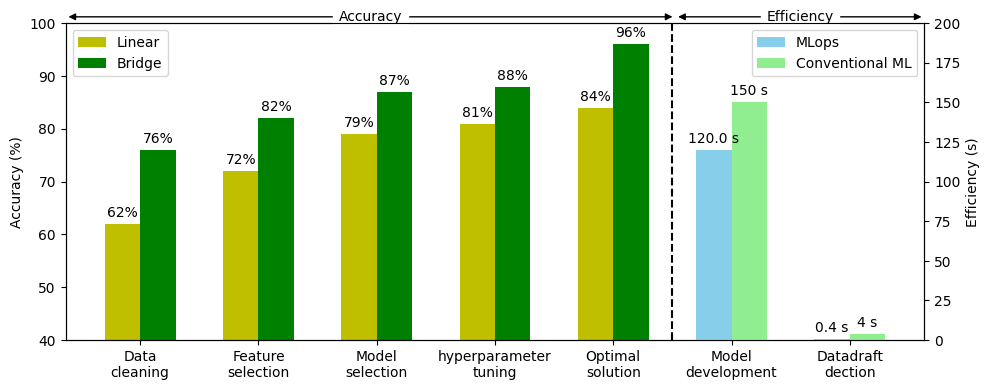

In [50]:
from matplotlib.transforms import Affine2D
import matplotlib.font_manager as fm
categories = ['Data cleaning', 'Feature selection', 'Model selection', 'hyperparameter tuning', 'Optimal solution',
              "Model development", "Datadraft dection"]

# Data for plotting - assuming the last two values are in ms and should be plotted on a different scale
performance_linear_ms = [120, 0.4]  
performance_bridge_ms = [150, 4]  

performance_bridge = [76, 82, 87, 88, 96,88,95]
performance_linear= [62, 72, 79, 81, 84,88,96]
width=0.3


# Plotting
ind = np.arange(len(categories))

fig, ax1 = plt.subplots(figsize=(10,4))

# Bar plot for performance except the last two, which are in ms
rects1 = ax1.bar(ind[:-2] - width/2, performance_linear[:-2], width, label='Linear', color='y')
rects2 = ax1.bar(ind[:-2] + width/2, performance_bridge[:-2], width, label='Bridge', color='green')
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate(f'{height}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
# Labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Accuracy (%)')
ax1.set_xticks(ind)
ax1.set_xticklabels([label.replace(" ", "\n") for label in categories], rotation=0, ha='center')
ax1.legend(loc='upper left')
ax1.set_ylim(40, 100)

# Create a second y-axis with different scale for the last two categories
ax2 = ax1.twinx()
ax2.set_ylabel('Efficiency (s)')
ax2.set_ylim(0, 200)  

# Plot the last two sets of bars for time in ms
rects1_ms = ax2.bar(ind[-2:] - width/2, performance_linear_ms, width, color='skyblue', label='MLops')
rects2_ms = ax2.bar(ind[-2:] + width/2, performance_bridge_ms, width, color='lightgreen', label='Conventional ML')


# Separating packet level and flow level with a dashed line

ax1.axvline(x=4.5, color='black', linestyle='--')

# Annotate with text labels above the bars for time
def autolabel_ms(rects, ax1):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate(f'{height} s',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel_ms(rects1_ms, ax2)
autolabel_ms(rects2_ms, ax2)
# Set the legends
ax1_legend = ax1.legend(loc='upper left')
ax2_legend = ax2.legend(loc='upper right')


# Add double-ended arrow


arrow_x_start = 0.0
arrow_x_end = 0.71
ax1.annotate('', xy=(arrow_x_start, 1.02), xycoords='axes fraction', xytext=(arrow_x_end, 1.02), 
             textcoords='axes fraction', arrowprops=dict(arrowstyle="<|-|>", color='black'))
ax1.text((arrow_x_start + arrow_x_end) / 2, 1.02, 'Accuracy', horizontalalignment='center', 
         verticalalignment='center', transform=ax1.transAxes, backgroundcolor='white')

arrow_x_start = 0.71
arrow_x_end = 1
ax1.annotate('', xy=(arrow_x_start, 1.02), xycoords='axes fraction', xytext=(arrow_x_end, 1.02), 
             textcoords='axes fraction', arrowprops=dict(arrowstyle="<|-|>", color='black'))
ax1.text((arrow_x_start + arrow_x_end) / 2, 1.02, 'Efficiency', horizontalalignment='center', 
         verticalalignment='center', transform=ax1.transAxes, backgroundcolor='white')


plt.tight_layout()  # Adjust layout to fit all labels

plt.show()



In [51]:
# 定义原始时间和新时间
original_time = 150
new_time = 120

# 计算效率提升百分比
efficiency_improvement = ((original_time - new_time) / original_time) * 100

efficiency_improvement



20.0

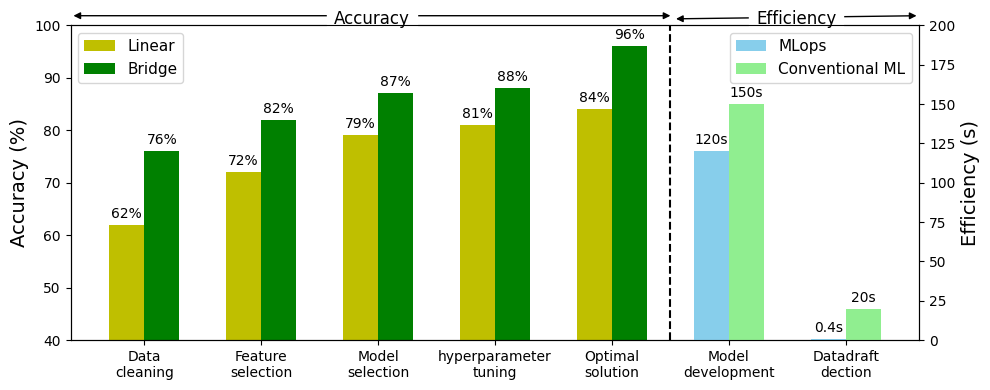

In [77]:
from matplotlib.transforms import Affine2D
import matplotlib.font_manager as fm
categories = ['Data cleaning', 'Feature selection', 'Model selection', 'hyperparameter tuning', 'Optimal solution',
              "Model development", "Datadraft dection"]

# Data for plotting
performance_mlops = [120, 0.4]  
performance_ml = [150, 20]  

performance_bridge = [76, 82, 87, 88, 96,88,95]
performance_linear= [62, 72, 79, 81, 84,88,96]
width=0.3


# Plotting
ind = np.arange(len(categories))

fig, ax1 = plt.subplots(figsize=(10,4))

# Bar plot for performance except the last two, which are in ms
rects1 = ax1.bar(ind[:-2] - width/2, performance_linear[:-2], width, label='Linear', color='y')
rects2 = ax1.bar(ind[:-2] + width/2, performance_bridge[:-2], width, label='Bridge', color='green')
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax1.annotate(f'{height}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
# Labels, title and custom x-axis tick labels, etc.
ax1.set_ylabel('Accuracy (%)',fontsize=14)
ax1.set_xticks(ind)
ax1.set_xticklabels([label.replace(" ", "\n") for label in categories], rotation=0, ha='center')
ax1.legend(loc='upper left')
ax1.set_ylim(40, 100)

# Create a second y-axis with different scale for the last two categories
ax2 = ax1.twinx()
ax2.set_ylabel('Efficiency (s)',fontsize=14)
ax2.set_ylim(0, 200)  

# Plot the last two sets of bars for time in ms
rects1_ms = ax2.bar(ind[-2:] - width/2, performance_mlops, width, color='skyblue', label='MLops')
rects2_ms = ax2.bar(ind[-2:] + width/2, performance_ml, width, color='lightgreen', label='Conventional ML')


# Separating packet level and flow level with a dashed line

ax1.axvline(x=4.5, color='black', linestyle='--')

# Annotate with text labels above the bars for time
def autolabel_ms(rects, ax):
    """Attach a text label above each bar in *rects*"""
    for rect in rects:
        height = rect.get_height()
        label = "{:g}".format(height) 
        ax.annotate(label + 's',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel_ms(rects1_ms, ax2)
autolabel_ms(rects2_ms, ax2)


# Add double-ended arrow


arrow_x_start = 0.0
arrow_x_end = 0.71
ax1.annotate('', xy=(arrow_x_start, 1.03), xycoords='axes fraction', xytext=(arrow_x_end, 1.03), 
             textcoords='axes fraction', arrowprops=dict(arrowstyle="<|-|>", color='black'))
ax1.text((arrow_x_start + arrow_x_end) / 2, 1.02, 'Accuracy', horizontalalignment='center', 
         verticalalignment='center', transform=ax1.transAxes, backgroundcolor='white',fontsize=12)

arrow_x_start = 0.71
arrow_x_end = 1
ax1.annotate('', xy=(arrow_x_start, 1.02), xycoords='axes fraction', xytext=(arrow_x_end, 1.03), 
             textcoords='axes fraction', arrowprops=dict(arrowstyle="<|-|>", color='black'))
ax1.text((arrow_x_start + arrow_x_end) / 2, 1.02, 'Efficiency', horizontalalignment='center', 
         verticalalignment='center', transform=ax1.transAxes, backgroundcolor='white',fontsize=12)
ax1_legend = ax1.legend(loc='upper left',fontsize=11)
ax2_legend = ax2.legend(loc='upper right',fontsize=11)

plt.tight_layout()  # Adjust layout to fit all labels
plt.savefig('usercase_illustration.pdf')
plt.show()
